In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

In [ ]:
def create_circluar_data(data, center1, radius1, center2, radius2, center3, radius3):
    '''
    Create circular data from the given data by iterating
    over the data and checking if the distance of the data 
    point to the center is less than the radius. If it is, 
    then the data point is added to the circular data.
    '''
    circleuar_data1 = []
    circleuar_data2 = []
    circleuar_data3 = []
    
    c1 = 0
    c2 = 0
    c3 = 0
    for i in range(data.shape[0]):
        if c1 <= len(circleuar_data1) and np.linalg.norm(data[i]-center1, ) <= radius1:
            circleuar_data1.append(data[i])
            c1 += 1
        elif c2 <= len(circleuar_data2) and np.linalg.norm(data[i]-center2) <= radius2:
            circleuar_data2.append(data[i])
            c2 += 1
        elif c3 <= len(circleuar_data3) and np.linalg.norm(data[i]-center3) <= radius3:
            circleuar_data3.append(data[i])
            c3 += 1
    
    print("Size of circle 1:", c1)
    print("Size of circle 2:", c2)
    print("Size of circle 3:", c3)
    
    return np.asarray(circleuar_data1), np.asarray(circleuar_data2), np.asarray(circleuar_data3)
    

In [ ]:
def neighborhood_function(distance, gaussian_deviation):
    return np.exp(-distance**2/(2*gaussian_deviation**2))

In [ ]:
def learning_rate_decay(initial_lr, final_lr, max_iterations):
    def learning_rate_time_shrinked(t):
        return initial_lr * (final_lr/initial_lr)**(t/max_iterations)
    
    return learning_rate_time_shrinked

In [ ]:
def learning_rule(stimulus, centers, responses, gaussian_deviation, time_step):
    # sort the response indices in ascending order 
    # (least response means most similar)
    # sorted_responses_indices will be a list of 
    # indices of the centers such that if they were
    # sorted in ascending order, the order of the
    # indices would be the same
    sorted_responses_indices = [i[0] for i in sorted(enumerate(responses), key=lambda x:x[1])] 
    for j in range(len(centers)):
        distance = sorted_responses_indices[j]
        delta_center_j = learning_rate(time_step)*neighborhood_function(distance, gaussian_deviation)*(stimulus-centers[j])
        centers[j] += delta_center_j
    return centers

In [ ]:
def initialize_centers(data, K):
    '''Randomly select K data points as centers'''
    centers = np.random.choice(data.shape[0], K, replace=False)
    return data[centers]


In [ ]:
N = 2 # input data dimension

# the initial size of the data, because
# at first theis number of data points will
# be generated and then the circular data
# will be extracted from them. Hence, the 
# final number of data points will be less 
# than this number
initial_data_size = 10000 

Size of circle 1: 1231
Size of circle 2: 1242
Size of circle 3: 1282


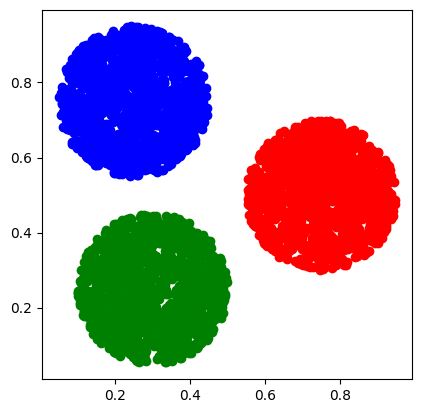

In [ ]:
data = np.random.random((initial_data_size, N))

center1 = np.array([0.25, 0.75])
radius1 = 0.2

center2 = np.array([0.75, 0.5])
radius2 = 0.2

center3 = np.array([0.3, 0.25])
radius3 = 0.2

data1, data2, data3 = create_circluar_data(data, center1, radius1, center2, radius2, center3, radius3)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(data1[:, 0], data1[:, 1], color='blue')
ax.scatter(data2[:, 0], data2[:, 1], color='red')
ax.scatter(data3[:, 0], data3[:, 1], color='green')

(3755, 2)


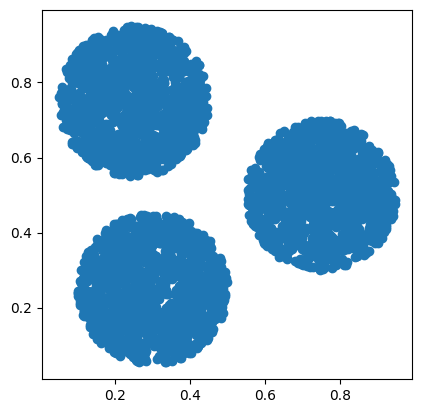

In [ ]:
data = np.vstack((data1, data2, data3))

print(data.shape)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(data[:, 0], data[:, 1])

In [ ]:
class NeuralGas:
    def __init__(self, data, K):
        self.centers = initialize_centers(data, K)
        self.gaussian_deviation = 1
        self.learning_rate = learning_rate_decay(initial_lr, final_lr, EPOCHS)
        
    def compute_responses(self, stimulus):
        self.responses =  np.linalg.norm(self.centers-stimulus, axis=1)

    def train(self, data, time_step):
        stimulus = data
        self.centers = learning_rule(stimulus, self.centers, self.responses, self.gaussian_deviation, time_step)
        

In [ ]:
# Global parameters
EPOCHS = 40
initial_lr = 0.1
final_lr = 0.08
gaussian_deviation = 4.5
learning_rate = learning_rate_decay(initial_lr, final_lr, EPOCHS)

In [ ]:
# Network parameters
K = 25 # number of centers in each network
M = 4 # number of networks

networks = []
for i in range(M):
    networks.append(NeuralGas(data, K))

In [ ]:
# history of the centers of all networks
# used for plotting the evolution of the centers
global_centers_history = np.empty((EPOCHS+1, M, K, N)) 
for i in range(M):
    global_centers_history[0][i] = networks[i].centers

for epoch in range(EPOCHS):
    # shuffle the data
    np.random.shuffle(data)
    for i in range(data.shape[0]):
        stimulus = data[i]
        for j in range(M):
            networks[j].compute_responses(stimulus)
        
        winner_network = np.argmin([np.min(networks[j].responses) for j in range(M)])
        networks[winner_network].train(stimulus, epoch)

    # we keep the history of the centers 
    # of all networks after each epoch
    for i in range(M):
        global_centers_history[epoch+1][i] = networks[i].centers

    
    if (epoch+1) % int(EPOCHS/10) == 0:
        print("epoch: ", epoch+1)
        


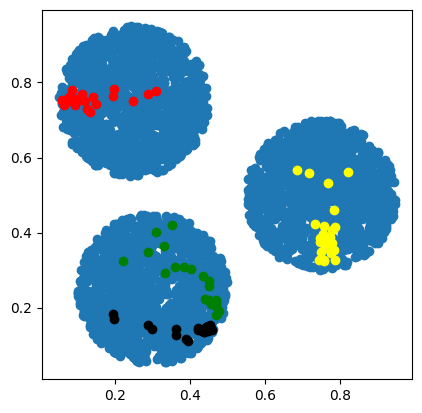

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(data[:, 0], data[:, 1])

colors = ['black', 'red', 'green', 'yellow']
for i in range(M):
    centers = global_centers_history[-1][i]
    ax.scatter(centers[:, 0], centers[:, 1], color=colors[i])

In [ ]:
# create a gif of the evolution of the centers
with imageio.get_writer('centers.gif', mode='I') as writer:
    colors = ['black', 'red', 'green', 'yellow']

    for i in range(global_centers_history.shape[0]):
        fig, ax = plt.subplots()
        ax.set_title(f"Epoch: {i:02d}")
        ax.set_aspect('equal')
        ax.scatter(data[:, 0], data[:, 1])
        for j in range(M):
            centers = global_centers_history[i][j]
            ax.scatter(centers[:, 0], centers[:, 1], color=colors[j], label=f"NG {j+1}")
        ax.legend()
        filename = "./plots/epoch_"+str(i)+".png"
        plt.savefig(filename)
        plt.close()

        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
# save the centers of all networks in a text file
with open('PA-E-net.txt', 'w') as f:
    for i in range(M):
        f.write(f"{'='*8} Network {i+1} {'='*9}\n")
        centers = global_centers_history[-1][i]
        for j in range(K):
            f.write(f"Center {j+1:02d}: {centers[j][0]:7f} {centers[j][1]:7f}\n")
        f.write("\n")